In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
clean_df=pd.read_csv(r'C:\Users\thari\OneDrive\Desktop\capstone_project\clean_crime_df.csv', low_memory=False)
clean_df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,PremiseType,Total_Incidents,Year,Month,day_of_month,day_of_year,week_of_year,day_of_week,dayname_of_week,Hour
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56.000000,WHITE,NORTHERN,HARWOOD,39.318181,...,STREET,1,2023,4,15,105,15,5,Saturday,11
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38.139283,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,GAS STATION,1,2023,4,15,105,15,5,Saturday,21
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56.000000,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,STREET,1,2023,4,15,105,15,5,Saturday,17
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54.000000,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,STREET,1,2023,4,15,105,15,5,Saturday,21
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58.000000,WHITE,WESTERN,MOSHER,39.296418,...,DRUG STORE / MED BL,1,2023,4,11,101,15,1,Tuesday,9


In [10]:
clean_df.shape

(454293, 21)

In [11]:
clean_df.isnull().sum()

CrimeDateTime      0
Description        0
Inside_Outside     0
Weapon             0
Gender             0
Age                0
Race               0
Old_District       0
Neighborhood       0
Latitude           0
Longitude          0
PremiseType        0
Total_Incidents    0
Year               0
Month              0
day_of_month       0
day_of_year        0
week_of_year       0
day_of_week        0
dayname_of_week    0
Hour               0
dtype: int64

PROJECT GOALS:
* Identify and analyze the crime trends through the years in Baltimore 
* Examining the variations in crime trends based on month and day.
* Which hour of the day has the most crime?
* Finding the high-crime area.
* Analyzing the crime in a district based on the crime categories. 

#### CRIME RATE PER YEAR

In [12]:
crimes_per_year=clean_df.groupby('Year')['Total_Incidents'].agg(['count']).reset_index()
crimes_per_year=crimes_per_year.rename(columns={"count": "# of crimes"})
crimes_per_year

,Year,# of crimes
0,2013,46601
1,2014,44204
2,2015,46844
3,2016,46967
4,2017,41430
5,2018,39479
6,2019,37345
7,2020,28930
8,2021,32849
9,2022,40270


Text(0.5, 1.0, 'crimes since 2013')

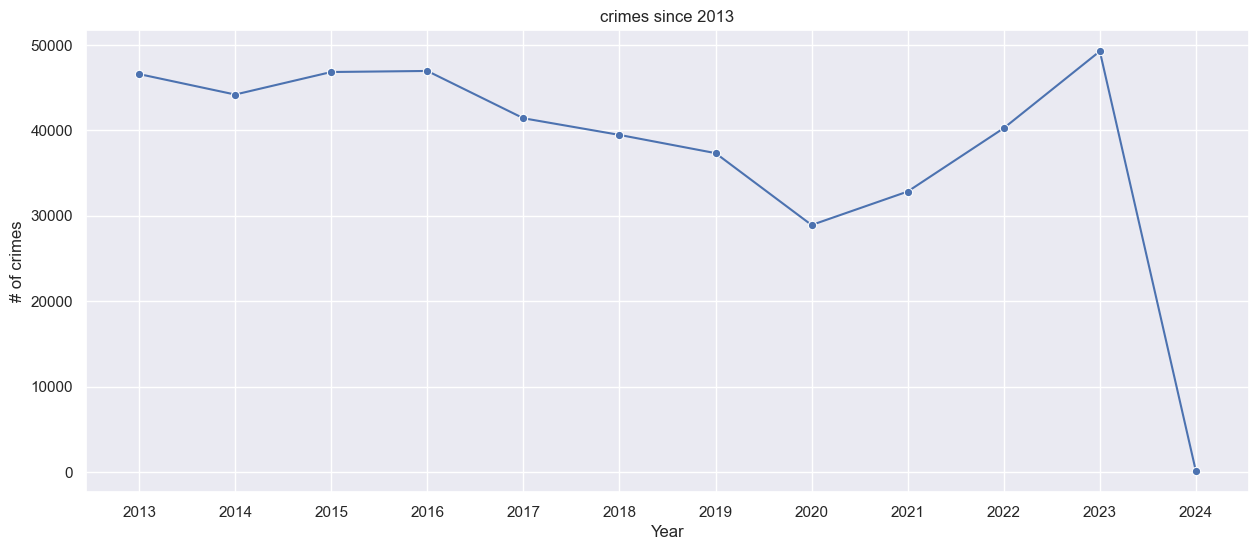

In [14]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_per_year, x='Year', y='# of crimes', marker='o')
plt.xlabel("Year")
plt.xticks(range(2013,2025))
plt.ylabel("# of crimes")
plt.title("crimes since 2013")

The crime was higher in the year 2023 followed by 2016. 2024 has the least as the data is available only for the 2 months currently. Comparitively, there was a lesser crime in 2020 followed by 2021.

#### CRIME RATE PER MONTH

In [15]:
crimes_per_month=clean_df.groupby('Month')['Total_Incidents'].agg(['count']).reset_index()
crimes_per_month= crimes_per_month.rename(columns={"count": "# of crimes"})
crimes_per_month

,Month,# of crimes
0,1,33047
1,2,29152
2,3,33654
3,4,35440
4,5,39840
5,6,40615
6,7,41641
7,8,41986
8,9,41074
9,10,42602


Text(0.5, 1.0, 'Crimes by Month')

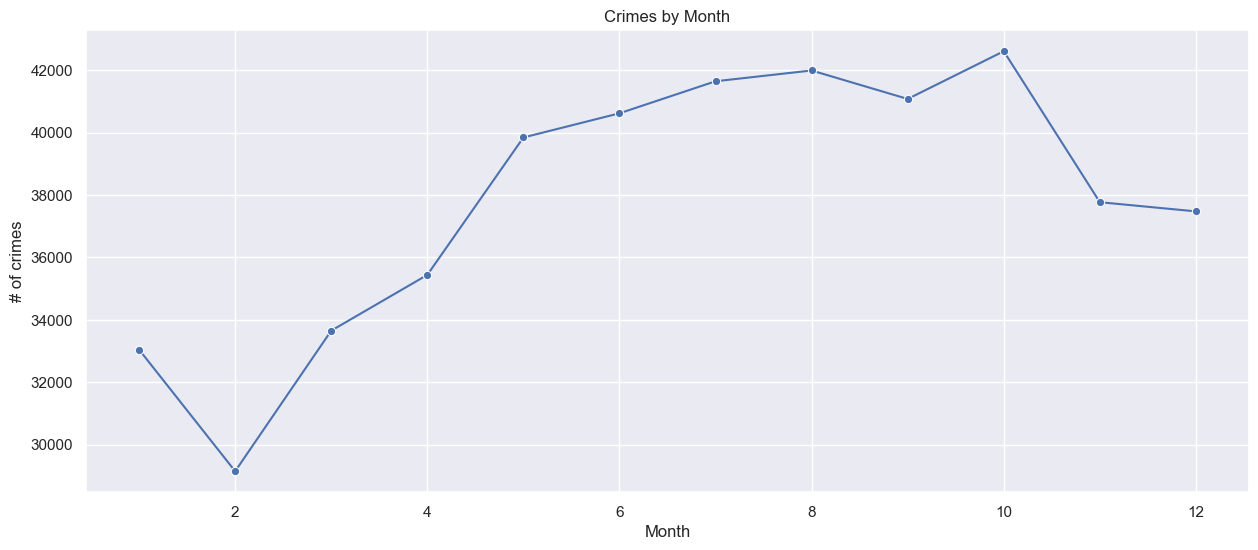

In [16]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_per_month, x='Month', y='# of crimes', marker='o')
plt.xlabel("Month")
plt.ylabel("# of crimes")
plt.title("Crimes by Month")

October follwed by August has the highest crime rate where as february has the least crime.

#### CRIME PER DAY IN A WEEK

In [27]:
crimes_per_day=clean_df.groupby('dayname_of_week')['Total_Incidents'].agg(['count']).reset_index()
crimes_per_day= crimes_per_day.rename(columns={"count": "# of crimes"})
crimes_per_day

,dayname_of_week,# of crimes
0,Friday,67784
1,Monday,66039
2,Saturday,65067
3,Sunday,63615
4,Thursday,63225
5,Tuesday,64568
6,Wednesday,63995


In [28]:
crimes_per_day.columns

Index(['dayname_of_week', '# of crimes'], dtype='object')

Text(0.5, 1.0, 'Crimes by Day in a week')

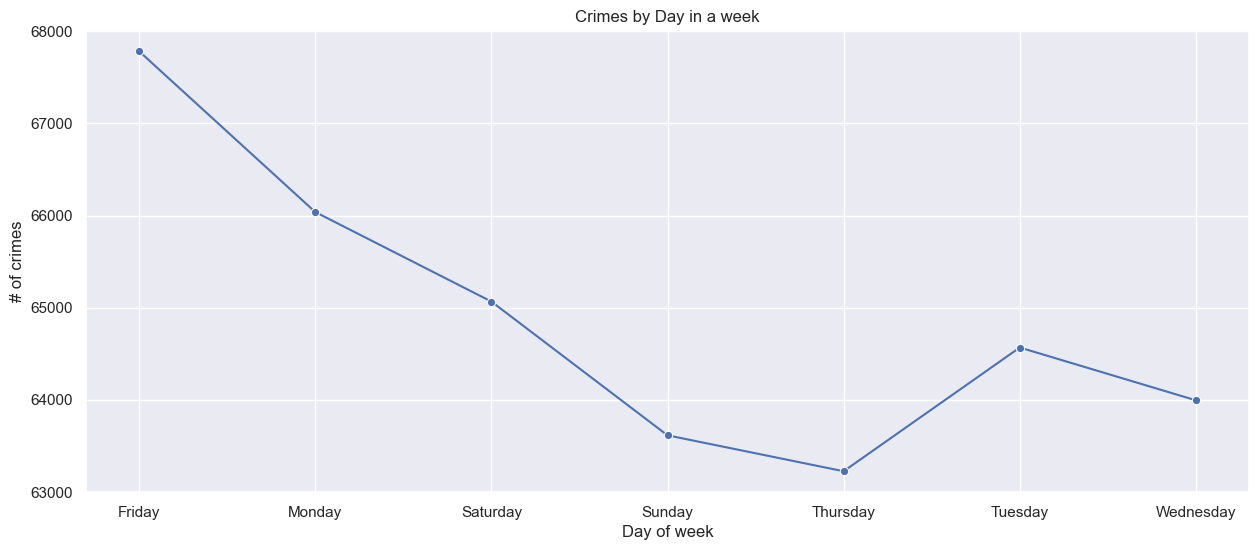

In [29]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_per_day, x='dayname_of_week', y='# of crimes', marker='o')
plt.xlabel("Day of week")
plt.ylabel("# of crimes")
plt.title("Crimes by Day in a week")

Fromt he above graph, we can say that Friday has the highest crime where thursday followed by sunday has the least crime.

#### CRIME BY TIME 

In [30]:
crimes_by_time_in_day=clean_df.groupby('Hour')['Total_Incidents'].agg(['count']).reset_index()
crimes_by_time_in_day= crimes_by_time_in_day.rename(columns={"count": "# of crimes"})
crimes_by_time_in_day

,Hour,# of crimes
0,0,23249
1,1,17543
2,2,13920
3,3,10382
4,4,8338
5,5,7255
6,6,7937
7,7,11401
8,8,14668
9,9,15611


Text(0.5, 1.0, 'Crimes over time in the day')

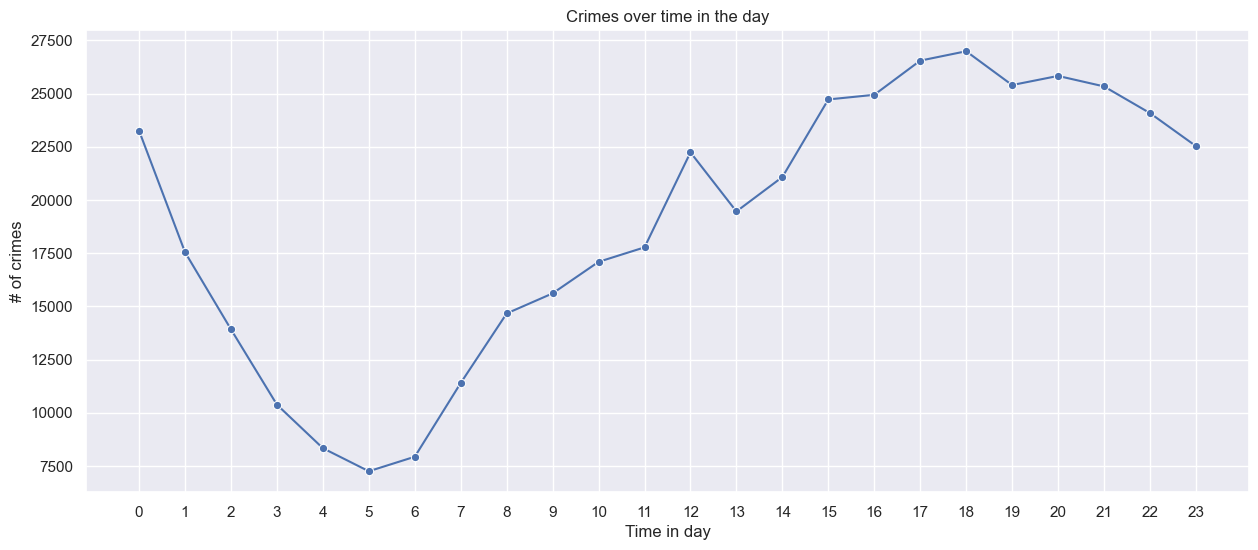

In [31]:
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=crimes_by_time_in_day, x='Hour', y='# of crimes', marker='o')
plt.xlabel("Time in day")
plt.ylabel("# of crimes")
plt.xticks(range(0,24))
plt.title("Crimes over time in the day")

There is a high crime occurrance between 5 PM and 6 PM in a day and the least between 4 AM and 5 AM

Analyze the crimes in the year 2017: may be type of crime, its time etc

In [15]:
#crime_df_clean_copy=crime_df_clean.copy()

In [42]:
#crime rate based on crime category
crime_types=clean_df.Description.value_counts()
crime_by_category=crime_types.to_frame()
crime_by_category

,count
Description,
LARCENY,98695
COMMON ASSAULT,81454
BURGLARY,59699
AGG. ASSAULT,53133
LARCENY FROM AUTO,52530
AUTO THEFT,47542
ROBBERY,36496
SHOOTING,6603
ROBBERY - COMMERCIAL,5791


<Axes: title={'center': 'Crime Type'}, xlabel='Description', ylabel='count'>

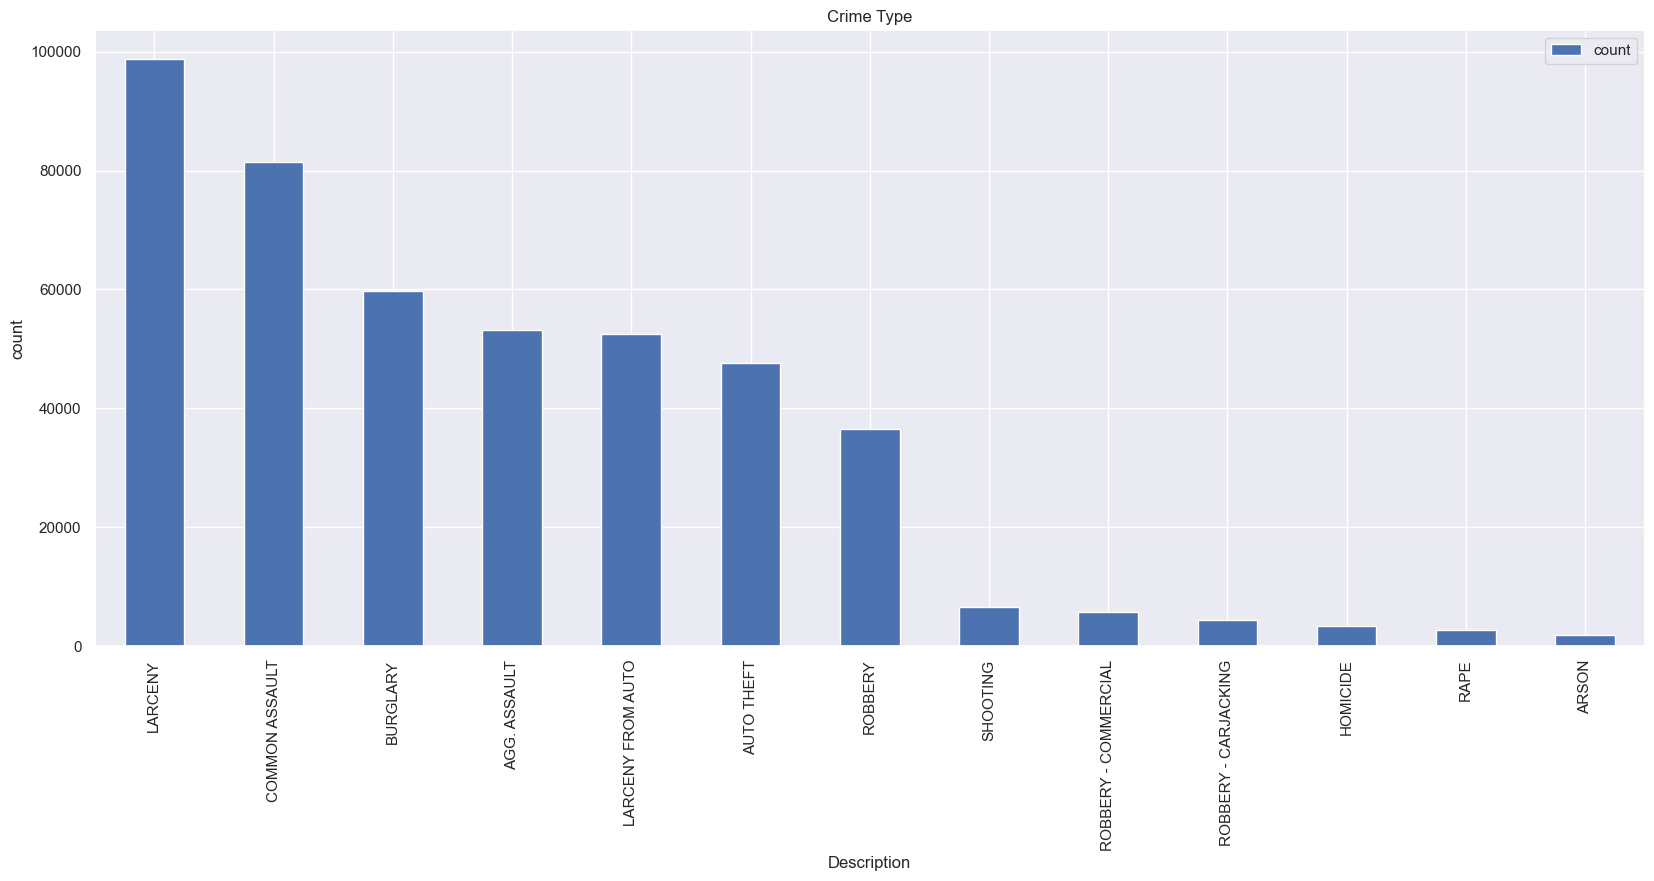

In [43]:
crime_by_category.plot(kind='bar',figsize=(20,8), xlabel="Description",ylabel="count", title="Crime Type")

In [32]:
a=clean_df.Old_District.value_counts()
crime_by_district=a.to_frame()
crime_by_district

,count
Old_District,
NORTHEAST,64158
SOUTHEAST,58417
SOUTHERN,48504
CENTRAL,48403
NORTHERN,45782
SOUTHWEST,43697
NORTHWEST,43522
EASTERN,37134
WESTERN,34310


<Axes: title={'center': 'Crime per District'}, xlabel='Old_District', ylabel='count'>

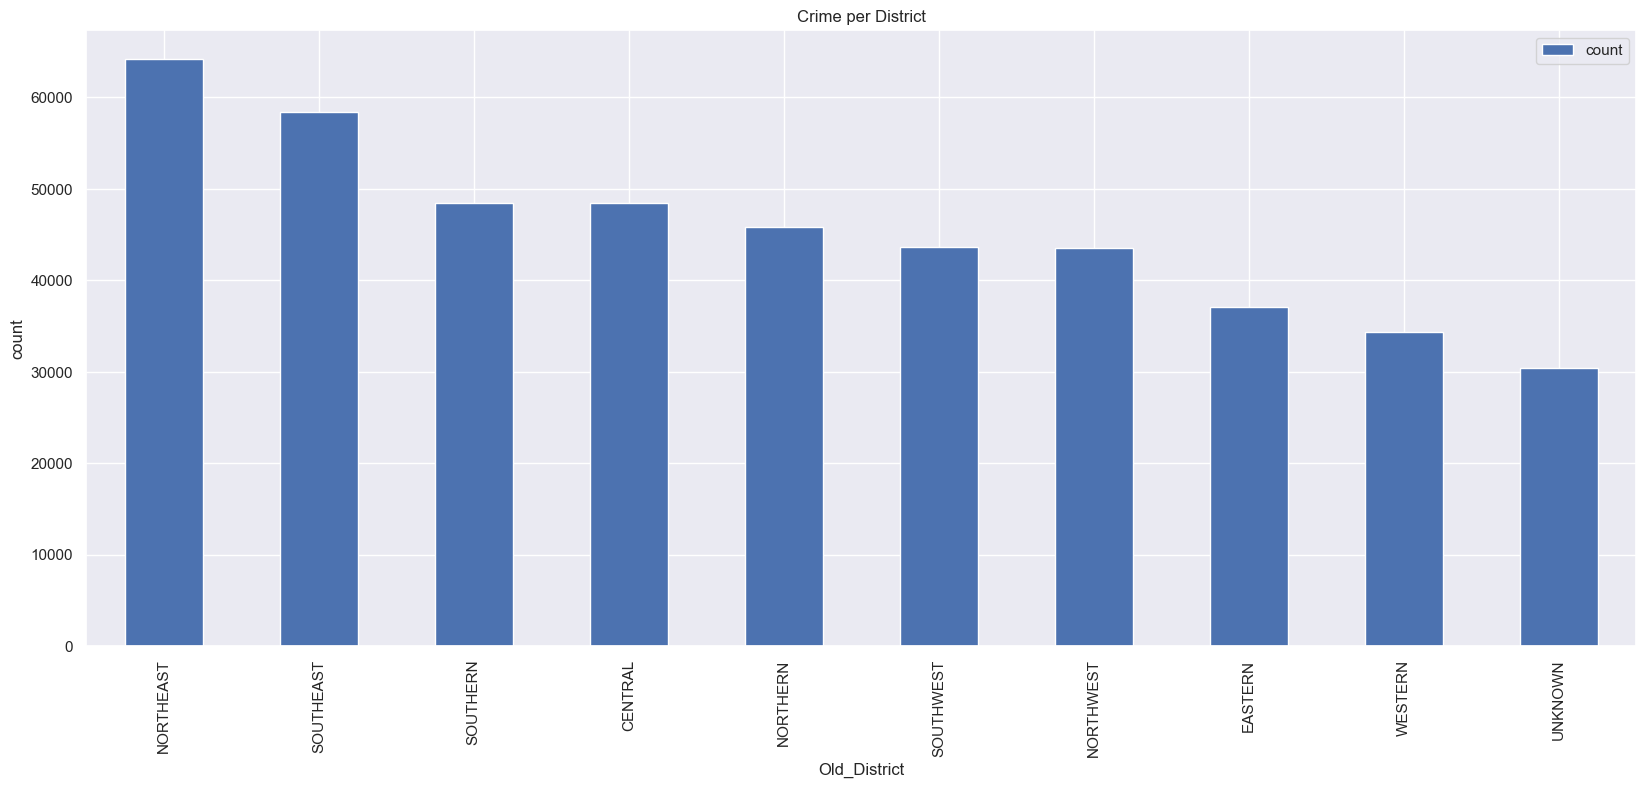

In [33]:
crime_by_district.plot(kind='bar',figsize=(20,8), xlabel="Old_District",ylabel="count", title= "Crime per District")

In [38]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
from IPython.display import display

district_dropdown = widgets.Dropdown(options=sorted(clean_df['Old_District'].unique()), value=clean_df['Old_District'].unique()[0], description='District')
#crime_dropdown = widgets.Dropdown(options=filtered_crime_df['Description'].unique(), value=filtered_crime_df['Description'].unique()[0], description='Crime Category')

#display(widgets.HBox([year_dropdown, crime_dropdown]))
def district_category_crime(district):
    sns.set(rc={'figure.figsize':(15,6)})
    data=clean_df[(clean_df['Old_District'] == district)]
    data=data.Description.value_counts()
    current_data=data.to_frame()
    #current_data
    #print(current_data.columns)
    current_data.plot(kind='bar',figsize=(20,8), xlabel="Description",ylabel="# of crimes", title=f" crime rate in {district}")
    
interact(district_category_crime, district=district_dropdown)

interactive(children=(Dropdown(description='District', index=3, options=('CENTRAL', 'EASTERN', 'NORTHEAST', 'N…

<function __main__.district_category_crime(district)>

In [39]:
district_dropdown = widgets.Dropdown(options=sorted(clean_df['Old_District'].unique()), value=clean_df['Old_District'].unique()[0], description='District')
#crime_dropdown = widgets.Dropdown(options=filtered_crime_df['Description'].unique(), value=filtered_crime_df['Description'].unique()[0], description='Crime Category')

#display(widgets.HBox([year_dropdown, crime_dropdown]))
def district_category_crime(district):
    sns.set(rc={'figure.figsize':(15,6)})
    data=clean_df[(clean_df['Old_District'] == district)]
    data=data.PremiseType.value_counts()
    current_data=data.to_frame()
    current_data=current_data.head(10)
    #current_data
    #print(current_data.columns)
    current_data.plot(kind='bar',figsize=(20,8), xlabel="PremiseType",ylabel="# of crimes", title=f" crime rate in {district}")
    
interact(district_category_crime, district=district_dropdown)

interactive(children=(Dropdown(description='District', index=3, options=('CENTRAL', 'EASTERN', 'NORTHEAST', 'N…

<function __main__.district_category_crime(district)>

#### CRIME RATE PER GENDER

In [44]:
crime_by_gender=clean_df.groupby('Gender')['Total_Incidents'].agg(['count']).reset_index()

In [45]:
crime_by_gender.columns

Index(['Gender', 'count'], dtype='object')

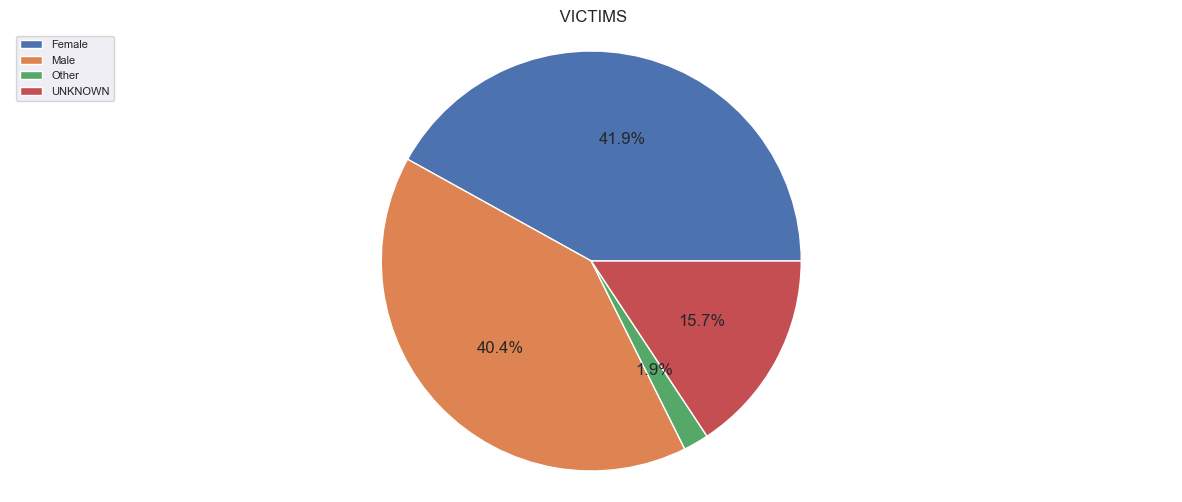

In [53]:
plt.figure(figsize=(15,6))
plt.pie(crime_by_gender['count'], startangle=0,autopct='%1.1f%%')
plt.legend(labels=crime_by_gender['Gender'], loc='upper left',prop={'size':8})
plt.axis('equal')
plt.title(" VICTIMS")
plt.show()

In [54]:
clean_df.Weapon.unique()

array(['UNKNOWN', 'HANDGUN', 'PERSONAL_WEAPONS', 'AUTOMATIC_HANDGUN',
       'BLUNT_OBJECT', 'FIREARM', 'KNIFE_CUTTING_INSTRUMENT',
       'MOTOR_VEHICLE_VESSEL', 'KNIFE', 'OTHER', 'HANDS', 'RIFLE', 'FIRE',
       'ASPHYXIATION', 'AUTOMATIC_FIREARM', 'OTHER_FIREARM', 'POISON',
       'SHOTGUN', 'AUTOMATIC_RIFLE', 'FIRE_INCENDIARY_DEVICE',
       'EXPLOSIVES', 'AUTOMATIC_SHOTGUN',
       'DRUGS_NARCOTICS_SLEEPING_PILLS'], dtype=object)

In [55]:
weapon_series=clean_df.Weapon.value_counts()

In [56]:
weapon_series

Weapon
UNKNOWN                           334579
FIREARM                            37284
PERSONAL_WEAPONS                   29504
OTHER                              21959
KNIFE                              11735
HANDGUN                             6348
HANDS                               4739
KNIFE_CUTTING_INSTRUMENT            3244
BLUNT_OBJECT                        2174
FIRE                                1519
MOTOR_VEHICLE_VESSEL                 458
AUTOMATIC_HANDGUN                    127
ASPHYXIATION                         126
OTHER_FIREARM                        115
RIFLE                                112
SHOTGUN                               77
FIRE_INCENDIARY_DEVICE                74
AUTOMATIC_FIREARM                     61
POISON                                29
AUTOMATIC_RIFLE                       17
DRUGS_NARCOTICS_SLEEPING_PILLS         5
EXPLOSIVES                             4
AUTOMATIC_SHOTGUN                      3
Name: count, dtype: int64

In [57]:
weapons_df=weapon_series.to_frame().reset_index()

In [58]:
weapons_df.columns

Index(['Weapon', 'count'], dtype='object')

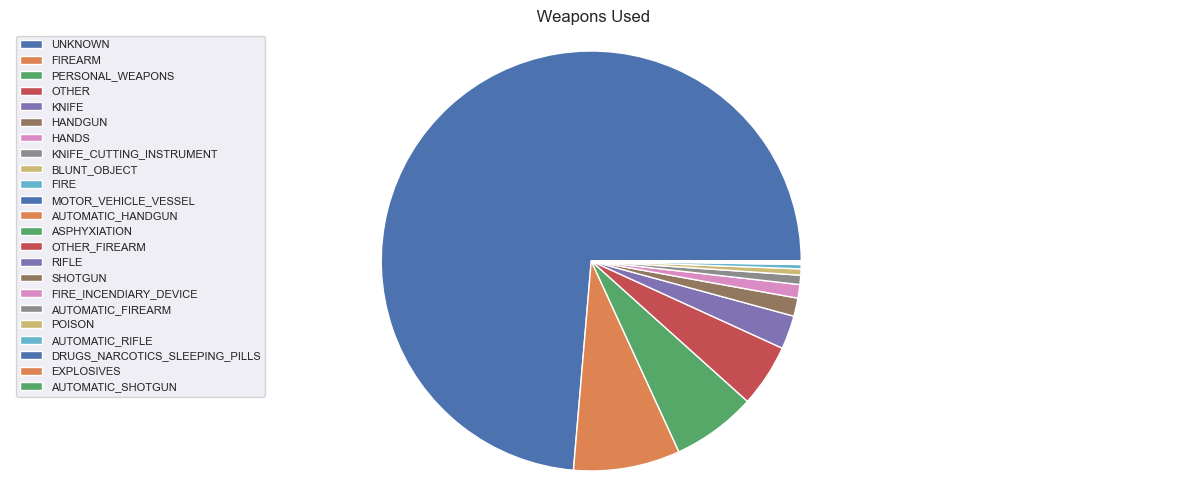

In [59]:
plt.figure(figsize=(15,6))
plt.pie(weapons_df['count'], startangle=0)
plt.legend(labels=weapons_df['Weapon'], loc='upper left',prop={'size':8})
plt.axis('equal')
plt.title(" Weapons Used")
plt.show()

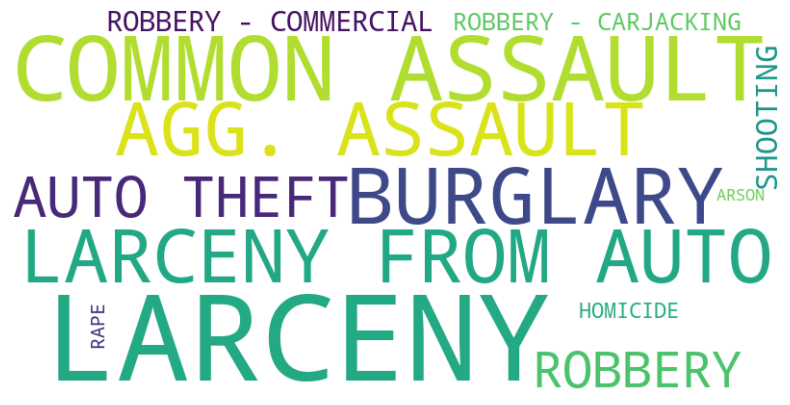

In [60]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


crime_type_counts = clean_df['Description'].value_counts()
crime_type_counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(crime_type_counts)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


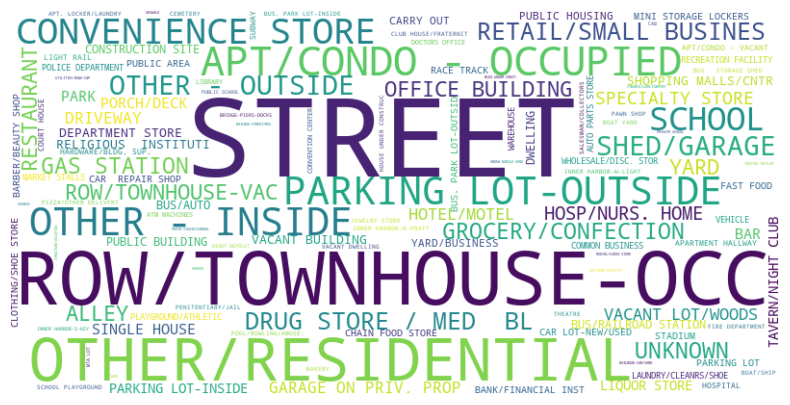

In [61]:
premise_type_counts = clean_df['PremiseType'].value_counts()
premise_type_counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(premise_type_counts)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.pie(crime_by_gender['count'],labels=crime_by_gender['Gender'],
       autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title(" VICTIMS")
plt.show()

In [62]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454293 entries, 0 to 454292
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDateTime    454293 non-null  object 
 1   Description      454293 non-null  object 
 2   Inside_Outside   454293 non-null  object 
 3   Weapon           454293 non-null  object 
 4   Gender           454293 non-null  object 
 5   Age              454293 non-null  float64
 6   Race             454293 non-null  object 
 7   Old_District     454293 non-null  object 
 8   Neighborhood     454293 non-null  object 
 9   Latitude         454293 non-null  float64
 10  Longitude        454293 non-null  float64
 11  PremiseType      454293 non-null  object 
 12  Total_Incidents  454293 non-null  int64  
 13  Year             454293 non-null  int64  
 14  Month            454293 non-null  int64  
 15  day_of_month     454293 non-null  int64  
 16  day_of_year      454293 non-null  int6

In [63]:
clean_df.head()

,CrimeDateTime,Description,Inside_Outside,Weapon,Gender,Age,Race,Old_District,Neighborhood,Latitude,...,PremiseType,Total_Incidents,Year,Month,day_of_month,day_of_year,week_of_year,day_of_week,dayname_of_week,Hour
0,2023-04-15 11:30:00+00:00,LARCENY,Inside,UNKNOWN,Female,56.000000,WHITE,NORTHERN,HARWOOD,39.318181,...,STREET,1,2023,4,15,105,15,5,Saturday,11
1,2023-04-15 21:50:00+00:00,LARCENY,Inside,UNKNOWN,UNKNOWN,38.139283,UNKNOWN,NORTHEAST,PULASKI INDUSTRIAL AREA,39.310944,...,GAS STATION,1,2023,4,15,105,15,5,Saturday,21
2,2023-04-15 17:00:00+00:00,LARCENY FROM AUTO,Inside,UNKNOWN,Male,56.000000,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,MOUNT HOLLY,39.313038,...,STREET,1,2023,4,15,105,15,5,Saturday,17
3,2023-04-15 21:15:00+00:00,ROBBERY,Inside,HANDGUN,Male,54.000000,WHITE,NORTHWEST,CENTRAL PARK HEIGHTS,39.337523,...,STREET,1,2023,4,15,105,15,5,Saturday,21
4,2023-04-11 09:25:00+00:00,COMMON ASSAULT,Outside,PERSONAL_WEAPONS,Male,58.000000,WHITE,WESTERN,MOSHER,39.296418,...,DRUG STORE / MED BL,1,2023,4,11,101,15,1,Tuesday,9


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load historical crime data
crime_data = pd.read_csv("historical_crime_data.csv")

# Feature Engineering
# Assuming you have features like location details, time of day, day of week, etc.

# Encode categorical features
label_encoder = LabelEncoder()
crime_data['EncodedCrimeType'] = label_encoder.fit_transform(crime_data['CrimeType'])

# Define features and target variable
X = crime_data[['LocationDetails', 'TimeOfDay', 'DayOfWeek']]
y = crime_data['EncodedCrimeType']

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

def predict_crime(location_details, time_of_day, day_of_week):
    # Prepare user input
    user_input = pd.DataFrame({'LocationDetails': [location_details],
                               'TimeOfDay': [time_of_day],
                               'DayOfWeek': [day_of_week]})
    
    # Make prediction
    prediction = model.predict(user_input)
    probability = model.predict_proba(user_input)
    
    # Decode the prediction
    predicted_crime = label_encoder.inverse_transform(prediction)
    
    return predicted_crime[0], probability[0]

# Example usage
location = "User's location details"
time = "User's time of day"
day = "User's day of week"

predicted_crime, probability = predict_crime(location, time, day)
print("Predicted Crime Type:", predicted_crime)
print("Probability:", probability)
